In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
dtype: int64

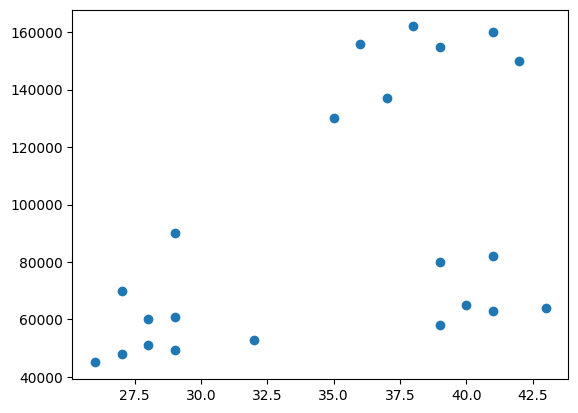

In [5]:
plt.scatter(df.Age,df['Income($)'])

### Using Elbow method to find optimum number of clusters


In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    wcss.append(km.inertia_)

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\anuku\miniconda3\lib\site-packages\sklearn\

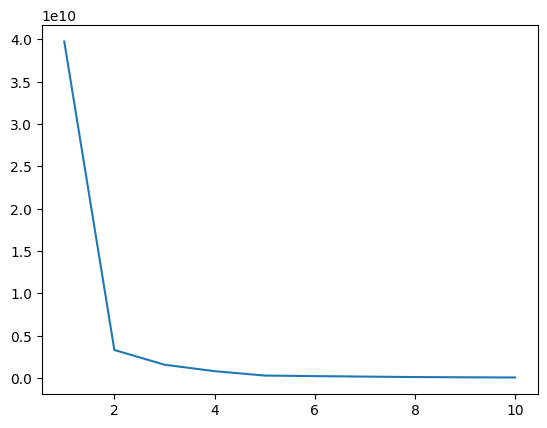

In [8]:
plt.plot(range(1,11),wcss)

## Training the K-Means model on the dataset

In [9]:
km = KMeans(n_clusters=2)
prediction = km.fit_predict(df[['Age','Income($)']])
prediction

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
df['cluster']=prediction
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [11]:
km.cluster_centers_ # finding centroid for each clusters

array([[3.82857143e+01, 1.50000000e+05],
       [3.32000000e+01, 6.26333333e+04]])

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

Text(0, 0.5, 'Income ($)')

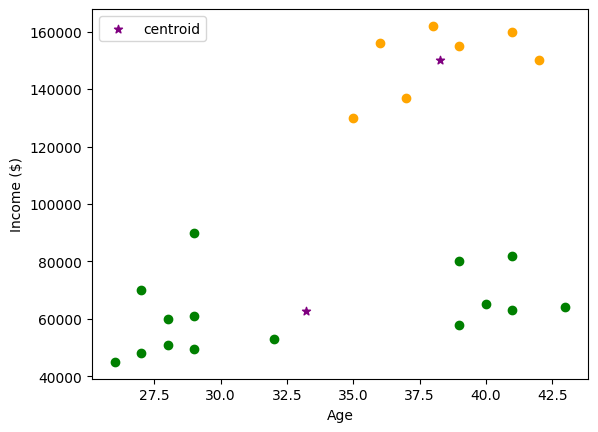

In [13]:
plt.scatter(df1.Age,df1['Income($)'],color='orange')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') # this is used to show the centroid in the graph
plt.legend()
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Completed................

## Pre processing

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

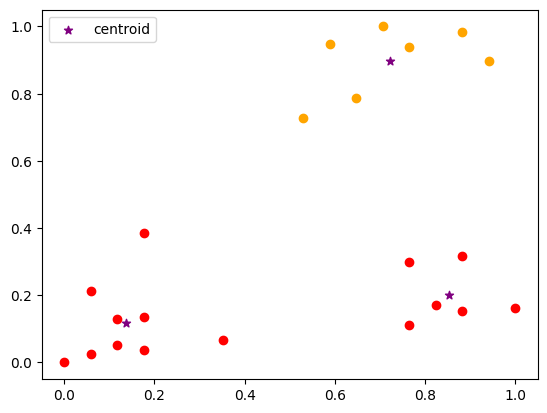

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],c='orange')
plt.scatter(df2.Age,df2['Income($)'],c='red')
plt.scatter(df3.Age,df3['Income($)'],c='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()